In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import entropy
from scipy.stats import poisson
from scipy.stats import norm

from matplotlib import pyplot as plt
import seaborn as sns

<center>
    Jensen–Shannon (divergence/distance)
</center>

<!-- https://www.oreilly.com/library/view/generative-adversarial-networks/9781789136678/655a672b-e4a1-4375-a76d-254fe6a75c4e.xhtml#:~:text=It%20is%20based%20on%20KL,is%20therefore%20a%20distance%20metric. -->

<div style="text-align:center; background:white">
    <img src='https://www.oreilly.com/api/v2/epubs/9781789136678/files/assets/ce0afe99-4137-4673-985a-b073ab66c347.png'>
</div>

In [2]:
def js(p, q):
    p = p / np.linalg.norm(p, ord=1)
    q = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p + q)
    r = 0.5 * (entropy(p, m) + entropy(q, m))
    return r

In [3]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
count, devision = np.histogram(data['Height'], bins=100)
print(count)
print(devision)

[  1   1   1   1   1   3   2   7   1   5  13  11  11  11  20  21  24  35
  32  40  45  46  68  86  77 109 113 108 121 153 155 163 185 177 190 192
 198 185 235 226 190 233 231 233 230 191 231 201 252 204 227 212 211 243
 215 224 228 213 172 222 209 197 181 162 142 176 136 145 130 134 139 106
 111  86  68  57  56  47  52  43  33  31  24  17  15   9  11  12   3   8
   8   5   3   2   1   0   1   1   2   1]
[54.26313333 54.51048942 54.75784551 55.0052016  55.25255769 55.49991378
 55.74726987 55.99462596 56.24198205 56.48933814 56.73669423 56.98405032
 57.23140641 57.4787625  57.72611859 57.97347468 58.22083077 58.46818686
 58.71554295 58.96289904 59.21025513 59.45761122 59.70496731 59.9523234
 60.19967949 60.44703558 60.69439167 60.94174776 61.18910385 61.43645994
 61.68381603 61.93117212 62.17852821 62.4258843  62.67324039 62.92059648
 63.16795257 63.41530866 63.66266475 63.91002084 64.15737693 64.40473302
 64.65208911 64.8994452  65.14680129 65.39415738 65.64151347 65.88886957
 66.136225

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Random variates ===> rvs(loc=0, scale=1, size=1, random_state=None)

ideal = norm.rvs(size=len(data['Height']), loc=data['Height'].mean(), scale=data['Height'].std())
icount, idevision = np.histogram(ideal, bins=100)

In [6]:
js(count, icount)

0.01772662214498711

In [7]:
js(icount, count)

0.01772662214498711

In [8]:
js(count, icount) == js(icount, count)

True

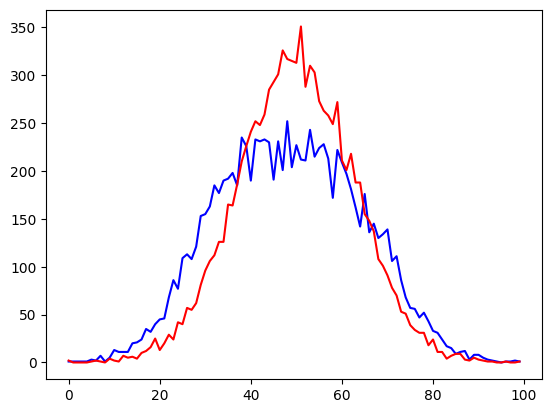

In [9]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [10]:
# https://github.com/plotly/datasets/blob/master/wind_speed_laurel_nebraska.csv

wsData = pd.read_csv('wind_speed_laurel_nebraska.csv')
wsData.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


In [11]:
count, devision = np.histogram(wsData['10 Min Sampled Avg'], bins=100)
print(count)
print(devision)

[ 1  0  1  0  0  0  0  0  1  0  1  1  0  3  2  1  2  0  1  0  1  0  0  3
  2  3  5  1  1  1  2  1  4  3  3 11  6 11  3  9  4  1  6  4  4  3  5  1
  4  3  1  3  1  1  1  2  2  1  4  2  2  4  4  1  3  2  2  1  3  0  6  7
  1  5  5  2  3  1  7  6  0  3  2  1  3  2  2  0  0  1  1  1  0  1  0  0
  0  0  0  2]
[ 4.9    5.178  5.456  5.734  6.012  6.29   6.568  6.846  7.124  7.402
  7.68   7.958  8.236  8.514  8.792  9.07   9.348  9.626  9.904 10.182
 10.46  10.738 11.016 11.294 11.572 11.85  12.128 12.406 12.684 12.962
 13.24  13.518 13.796 14.074 14.352 14.63  14.908 15.186 15.464 15.742
 16.02  16.298 16.576 16.854 17.132 17.41  17.688 17.966 18.244 18.522
 18.8   19.078 19.356 19.634 19.912 20.19  20.468 20.746 21.024 21.302
 21.58  21.858 22.136 22.414 22.692 22.97  23.248 23.526 23.804 24.082
 24.36  24.638 24.916 25.194 25.472 25.75  26.028 26.306 26.584 26.862
 27.14  27.418 27.696 27.974 28.252 28.53  28.808 29.086 29.364 29.642
 29.92  30.198 30.476 30.754 31.032 31.31  31.588 31.86

In [12]:
ideal = norm.rvs(size=len(wsData['10 Min Sampled Avg']), loc=wsData['10 Min Sampled Avg'].mean(), scale=wsData['10 Min Sampled Avg'])
icount, ideve = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 2 0 0 2 1 1 0 2 4 2 3 1 1 2 2 2 3 7 3
 3 0 6 7 3 1 5 8 5 4 8 7 6 7 7 5 5 5 5 6 6 4 5 5 2 5 3 6 3 3 3 3 2 1 3 3 0
 0 0 1 2 1 2 0 0 0 1 3 2 1 1 0 1 0 0 0 2 0 0 0 0 0 1]
[51.05675735 51.36067248 51.66458761 51.96850274 52.27241787 52.576333
 52.88024813 53.18416326 53.48807839 53.79199351 54.09590864 54.39982377
 54.7037389  55.00765403 55.31156916 55.61548429 55.91939942 56.22331455
 56.52722968 56.8311448  57.13505993 57.43897506 57.74289019 58.04680532
 58.35072045 58.65463558 58.95855071 59.26246584 59.56638097 59.8702961
 60.17421122 60.47812635 60.78204148 61.08595661 61.38987174 61.69378687
 61.997702   62.30161713 62.60553226 62.90944739 63.21336251 63.51727764
 63.82119277 64.1251079  64.42902303 64.73293816 65.03685329 65.34076842
 65.64468355 65.94859868 66.2525138  66.55642893 66.86034406 67.16425919
 67.46817432 67.77208945 68.07600458 68.37991971 68.68383484 68.98774997
 69.29166509 69.59558022 69.89949535 70.20341048 70.50732561 70.81124

In [13]:
js(count, icount)

0.14995767291274986

In [14]:
js(icount, count)

0.14995767291274986

In [15]:
js(count, icount) == js(icount, count)

True

<Axes: >

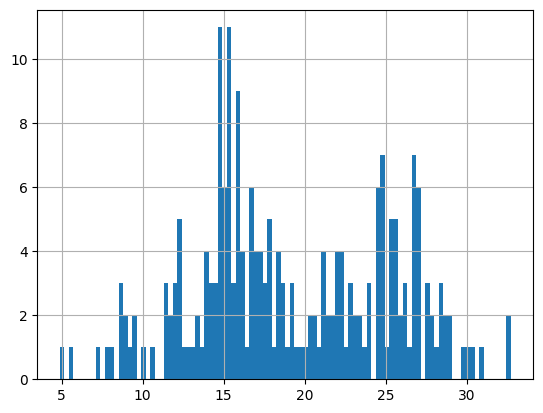

In [16]:
wsData['10 Min Sampled Avg'].hist(bins=100)